In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Notes:

- missing routes, see notes below, need to fix potentially
- only considering weekday (not weekday standard)


In [2]:
# Import statements:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# Local data paths:

GTFS_DATA_PATH = "mmt_gtfs/"
import os; os.listdir(GTFS_DATA_PATH) # Peak whats in the directory 

['fare_attributes.txt',
 'transfers.txt',
 'agency.txt',
 'fare_rules.txt',
 'calendar_dates.txt',
 'stop_times.txt',
 'shapes.txt',
 'trips.txt',
 'feed_info.txt',
 'stops.txt',
 'linked_datasets.txt',
 'stop_features.txt',
 'calendar.txt',
 'routes.txt',
 'translations.txt']

In [4]:
def getPandasDFCSV(path, file, sep=','):  
    """ Keyword Arg sep: deliminator used in txt file (default = ',')"""
    pandasDF = pd.read_csv(path +  file, sep=sep)
    return pandasDF

In [5]:
stop_times_df = getPandasDFCSV(GTFS_DATA_PATH, 'stop_times.txt')
stop_times_df.info()
stop_times_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217197 entries, 0 to 217196
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              217197 non-null  int64  
 1   stop_sequence        217197 non-null  int64  
 2   stop_id              217197 non-null  int64  
 3   pickup_type          217197 non-null  int64  
 4   drop_off_type        217197 non-null  int64  
 5   arrival_time         217197 non-null  object 
 6   departure_time       217197 non-null  object 
 7   timepoint            217197 non-null  int64  
 8   stop_headsign        217197 non-null  object 
 9   shape_dist_traveled  217197 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 16.6+ MB


trip_id  stop_sequence  stop_id  pickup_type  drop_off_type arrival_time  \
0  9999999              1     7605            0              1      5:27:00   
1  9999999              2     7739            0              0      5:27:40   
2  9999999              3     7119            0              0      5:28:33   

  departure_time  timepoint  stop_headsign  shape_dist_traveled  
0        5:27:00          1  EAST TRANSFER               0.0249  
1        5:27:40          0  EAST TRANSFER               0.2003  
2        5:28:33          0  EAST TRANSFER               0.4352

In [6]:
trips_df = getPandasDFCSV(GTFS_DATA_PATH, 'trips.txt')
trips_df.info()
trips_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5857 entries, 0 to 5856
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   route_id               5857 non-null   int64 
 1   route_short_name       5857 non-null   int64 
 2   service_id             5857 non-null   object
 3   trip_id                5857 non-null   int64 
 4   trip_headsign          5857 non-null   object
 5   direction_id           5857 non-null   int64 
 6   direction_name         5857 non-null   object
 7   block_id               5857 non-null   int64 
 8   shape_id               5857 non-null   int64 
 9   shape_code             5857 non-null   object
 10  trip_type              5272 non-null   object
 11  trip_sort              5857 non-null   int64 
 12  wheelchair_accessible  5857 non-null   int64 
 13  bikes_allowed          5857 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 640.7+ KB


route_id  route_short_name service_id  trip_id  \
0      9041                16     92_WKD  9999999   
1      9028                 2     92_WKD  1007843   
2      9028                 2     92_WKD  1007844   

                 trip_headsign  direction_id  direction_name  block_id  \
0                EAST TRANSFER             0   East Transfer    193133   
1  NORTH TRANSFER: VIA SHERMAN             0  North Transfer    194263   
2   NORTH TRANSFER: VIA FORDEM             0  North Transfer    194056   

   shape_id shape_code trip_type  trip_sort  wheelchair_accessible  \
0     55293       P16E         D      19620                      1   
1     55156         2S         W      20100                      1   
2     55154         2F         W      21600                      1   

   bikes_allowed  
0              1  
1              1  
2              1

In [7]:
stops_df = getPandasDFCSV(GTFS_DATA_PATH, 'stops.txt')
stops_df.info()
stops_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              2130 non-null   int64  
 1   stop_code            2130 non-null   object 
 2   stop_name            2130 non-null   object 
 3   stop_desc            2130 non-null   object 
 4   stop_lat             2130 non-null   float64
 5   stop_lon             2130 non-null   float64
 6   agency_id            2130 non-null   object 
 7   jurisdiction_id      2130 non-null   object 
 8   location_type        2130 non-null   int64  
 9   parent_station       5 non-null      float64
 10  relative_position    2130 non-null   int64  
 11  cardinal_direction   2122 non-null   float64
 12  wheelchair_boarding  2130 non-null   int64  
 13  primary_street       2130 non-null   object 
 14  address_range        2130 non-null   int64  
 15  cross_location       2130 non-null   o

stop_id stop_code                   stop_name  \
0     1110      1110   E Dayton & Wisconsin (WB)   
1     1111      1111  W Doty & M L K Junior (EB)   
2     1124      1124   S Fairchild & W Main (SB)   

                                           stop_desc   stop_lat   stop_lon  \
0  This EVENT/DETOUR ONLY stop (#1110) is westbou...  43.076428 -89.385920   
1  This EVENT/DETOUR ONLY stop (#1111) is eastbou...  43.072938 -89.382354   
2  This EVENT/DETOUR ONLY stop (#1124) is southbo...  43.072467 -89.385273   

  agency_id jurisdiction_id  location_type  parent_station  relative_position  \
0       MMT            CMAD              0             NaN                  3   
1       MMT            CMAD              0             NaN                  3   
2       MMT            CMAD              0             NaN                  3   

   cardinal_direction  wheelchair_boarding primary_street  address_range  \
0               270.0                    1       E Dayton              2   
1                90.0                    1         W Doty              1   
2               180.0                    1    S Fairchild             98   

  cross_location  
0      Wisconsin  
1   M L K Junior  
2         W Main

Want to go through trips data to pull out a characteristic trip for each route, should be a trip with the maximum number of stops, could look at trips with the min later for comparison, or look at time variance later as well. 

In [8]:
trips_df = getPandasDFCSV(GTFS_DATA_PATH, 'trips.txt')
trips_df.info()
trips_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5857 entries, 0 to 5856
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   route_id               5857 non-null   int64 
 1   route_short_name       5857 non-null   int64 
 2   service_id             5857 non-null   object
 3   trip_id                5857 non-null   int64 
 4   trip_headsign          5857 non-null   object
 5   direction_id           5857 non-null   int64 
 6   direction_name         5857 non-null   object
 7   block_id               5857 non-null   int64 
 8   shape_id               5857 non-null   int64 
 9   shape_code             5857 non-null   object
 10  trip_type              5272 non-null   object
 11  trip_sort              5857 non-null   int64 
 12  wheelchair_accessible  5857 non-null   int64 
 13  bikes_allowed          5857 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 640.7+ KB


route_id  route_short_name service_id  trip_id  \
0      9041                16     92_WKD  9999999   
1      9028                 2     92_WKD  1007843   
2      9028                 2     92_WKD  1007844   

                 trip_headsign  direction_id  direction_name  block_id  \
0                EAST TRANSFER             0   East Transfer    193133   
1  NORTH TRANSFER: VIA SHERMAN             0  North Transfer    194263   
2   NORTH TRANSFER: VIA FORDEM             0  North Transfer    194056   

   shape_id shape_code trip_type  trip_sort  wheelchair_accessible  \
0     55293       P16E         D      19620                      1   
1     55156         2S         W      20100                      1   
2     55154         2F         W      21600                      1   

   bikes_allowed  
0              1  
1              1  
2              1

In [9]:
# list of possible trips:

service_id_list = []

for i in trips_df['service_id']:
    if i not in service_id_list:
        service_id_list.append(i)
print(service_id_list)

['92_WKD', '92_SAT', '92_SUN', '92_HOL', '92_MWK', '92_WKD:R', '92_SAT:R', '92_SUN:R', '92_HOL:R', '92_SAT:L', '92_SUN:L', '92_WKD:L#6', '92_WKD:L=6', '92_WKD:S', '92_SAT:S', '92_SUN:S', '92_WKD:S#6', '92_WKD:S=6']


In [10]:
# list of possible routes:

route_short_name_list = []

for i in trips_df['route_short_name']:
    if i not in route_short_name_list:
        route_short_name_list.append(i)
print(route_short_name_list)

[16, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 20, 21, 22, 23, 26, 27, 30, 31, 32, 33, 36, 39, 40, 44, 48, 49, 50, 51, 52, 55, 67, 70, 72, 73, 75, 59, 63, 68, 78, 80, 84, 81, 82]


59, 63, 68, : weekend, holiday only

78: weekend only

80, 84 weekday standard

In [11]:
trips_df_weekday_peak = trips_df[trips_df['service_id'] == '92_WKD']
trips_df_weekday_peak

route_id  route_short_name service_id  trip_id  \
0         9041                16     92_WKD  9999999   
1         9028                 2     92_WKD  1007843   
2         9028                 2     92_WKD  1007844   
3         9028                 2     92_WKD  1007499   
4         9028                 2     92_WKD  1007497   
...        ...               ...        ...      ...   
1430      9084                75     92_WKD  1012813   
1431      9084                75     92_WKD  1011954   
1432      9084                75     92_WKD  1011953   
1433      9084                75     92_WKD  1011952   
1434      9084                75     92_WKD  1011950   

                    trip_headsign  direction_id  direction_name  block_id  \
0                   EAST TRANSFER             0   East Transfer    193133   
1     NORTH TRANSFER: VIA SHERMAN             0  North Transfer    194263   
2      NORTH TRANSFER: VIA FORDEM             0  North Transfer    194056   
3     NORTH TRANSFER: VIA SHERMAN             0  North Transfer    194052   
4      NORTH TRANSFER: VIA FORDEM             0  North Transfer    194058   
...                           ...           ...             ...       ...   
1430   CAPITOL SQUARE: VIA VERONA             1  Capitol Square    194507   
1431   CAPITOL SQUARE: VIA VERONA             1  Capitol Square    194393   
1432   CAPITOL SQUARE: VIA VERONA             1  Capitol Square    194394   
1433   CAPITOL SQUARE: VIA VERONA             1  Capitol Square    194395   
1434   CAPITOL SQUARE: VIA VERONA             1  Capitol Square    194396   

      shape_id shape_code trip_type  trip_sort  wheelchair_accessible  \
0        55293       P16E         D      19620                      1   
1        55156         2S         W      20100                      1   
2        55154         2F         W      21600                      1   
3        55156         2S         D      23400                      1   
4        55154         2F         D      25200                      1   
...        ...        ...       ...        ...                    ...   
1430     55456       75ip         W      61200                      1   
1431     55456       75ip         W      61500                      1   
1432     55455       75ia         W      63300                      1   
1433     55455       75ia         W      66000                      1   
1434     55455       75ia         W      66900                      1   

      bikes_allowed  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
1430              1  
1431              1  
1432              1  
1433              1  
1434              1  

[1435 rows x 14 columns]

In [12]:
# make a dictionary of routes with trip ID's for weekday service:

tripIDList_forRoutes_weekday92 = dict()

for i in route_short_name_list:
    trip_list = []
    for j in trips_df_weekday_peak[trips_df_weekday_peak['route_short_name'] == i].iterrows():
        trip_list.append(j[1]['trip_id'])
    tripIDList_forRoutes_weekday92[i] = trip_list

#tripIDList_forRoutes_weekday92

In [13]:
for route in tripIDList_forRoutes_weekday92:
    #print(route)
    #print(tripIDList_forRoutes_weekday92[route])
    
    for trip in tripIDList_forRoutes_weekday92[route]:
        trip_stop_time_df = stop_times_df[stop_times_df['trip_id'] == trip]
        print(trip_stop_time_df)

    trip_id  stop_sequence  stop_id  pickup_type  drop_off_type arrival_time  \
0   9999999              1     7605            0              1      5:27:00   
1   9999999              2     7739            0              0      5:27:40   
2   9999999              3     7119            0              0      5:28:33   
3   9999999              4     7107            0              0      5:28:53   
4   9999999              5     7663            0              0      5:29:51   
5   9999999              6     7729            0              0      5:30:48   
6   9999999              7     7115            0              0      5:31:10   
7   9999999              8     7328            0              0      5:31:57   
8   9999999              9     7838            0              0      5:32:47   
9   9999999             10     7152            0              0      5:33:25   
10  9999999             11     7388            0              0      5:34:22   
11  9999999             12     7215     

35124              11.7089  
       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
35125  1009439              1     4100            0              1   
35126  1009439              2     3500            0              0   
35127  1009439              3     3946            0              0   
35128  1009439              4     3600            0              0   
35129  1009439              5     3962            0              0   
35130  1009439              6     3235            0              0   
35131  1009439              7     3155            0              0   
35132  1009439              8     3222            0              0   
35133  1009439              9     3231            0              0   
35134  1009439             10     3259            0              0   
35135  1009439             11     3513            0              0   
35136  1009439             12     3429            0              0   
35137  1009439             13     3913            0          

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
36445  1012663              1     7100            0              1   
36446  1012663              2     1270            0              0   
36447  1012663              3     1786            0              0   
36448  1012663              4     1478            0              0   
36449  1012663              5     1890            0              0   
36450  1012663              6     7888            0              0   
36451  1012663              7     7296            0              0   
36452  1012663              8     7182            0              0   
36453  1012663              9     7834            0              0   
36454  1012663             10     7131            0              0   
36455  1012663             11     7823            0              0   
36456  1012663             12     7557            0              0   
36457  1012663             13     7578            0              0   
36458  1012663      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
36605  1012665              1     7100            0              1   
36606  1012665              2     1270            0              0   
36607  1012665              3     1786            0              0   
36608  1012665              4     1478            0              0   
36609  1012665              5     1890            0              0   
36610  1012665              6     7888            0              0   
36611  1012665              7     7296            0              0   
36612  1012665              8     7182            0              0   
36613  1012665              9     7834            0              0   
36614  1012665             10     7131            0              0   
36615  1012665             11     7823            0              0   
36616  1012665             12     7557            0              0   
36617  1012665             13     7578            0              0   
36618  1012665      

     trip_id  stop_sequence  stop_id  pickup_type  drop_off_type arrival_time  \
761  1007492              1     6100            0              1     12:00:00   
762  1007492              2     2925            0              0     12:01:02   
763  1007492              3     2401            0              0     12:02:12   
764  1007492              4     2249            0              0     12:02:55   
765  1007492              5     2669            0              0     12:03:32   
766  1007492              6     2201            0              0     12:04:04   
767  1007492              7     2121            0              0     12:04:59   
768  1007492              8     2175            0              0     12:06:00   
769  1007492              9     2101            0              0     12:06:56   
770  1007492             10     2395            0              0     12:07:32   
771  1007492             11     2752            0              0     12:08:05   
772  1007492             12 

     trip_id  stop_sequence  stop_id  pickup_type  drop_off_type arrival_time  \
932  1007475              1     6100            0              1     13:30:00   
933  1007475              2     2925            0              0     13:31:02   
934  1007475              3     2401            0              0     13:32:12   
935  1007475              4     2249            0              0     13:32:55   
936  1007475              5     2669            0              0     13:33:32   
937  1007475              6     2201            0              0     13:34:04   
938  1007475              7     2121            0              0     13:34:59   
939  1007475              8     2175            0              0     13:36:00   
940  1007475              9     2101            0              0     13:36:56   
941  1007475             10     2395            0              0     13:37:32   
942  1007475             11     2752            0              0     13:38:05   
943  1007475             12 

      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
2690  1007513              1     5100            0              1   
2691  1007513              2     1504            0              0   
2692  1007513              3     1922            0              0   
2693  1007513              4     1254            0              0   
2694  1007513              5     1122            0              0   
2695  1007513              6     1156            0              0   
2696  1007513              7     1968            0              0   
2697  1007513              8     1692            0              0   
2698  1007513              9     1116            0              0   
2699  1007513             10     1892            0              0   
2700  1007513             11     1798            0              0   
2701  1007513             12     1250            0              0   
2702  1007513             13     1636            0              0   
2703  1007513             14     1

2863              10.5327  
      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
2864  1007527              1     5100            0              1   
2865  1007527              2     1504            0              0   
2866  1007527              3     1922            0              0   
2867  1007527              4     1254            0              0   
2868  1007527              5     1122            0              0   
2869  1007527              6     1156            0              0   
2870  1007527              7     1968            0              0   
2871  1007527              8     1296            0              0   
2872  1007527              9     1838            0              0   
2873  1007527             10     1354            0              0   
2874  1007527             11     1936            0              0   
2875  1007527             12     1250            0              0   
2876  1007527             13     1636            0              0   
2877  

      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
4470  1007849              1     4100            0              1   
4471  1007849              2      590            0              0   
4472  1007849              3      782            0              0   
4473  1007849              4      499            0              0   
4474  1007849              5      405            0              0   
4475  1007849              6      391            0              0   
4476  1007849              7      845            0              0   
4477  1007849              8      843            0              0   
4478  1007849              9      915            0              0   
4479  1007849             10      519            0              0   
4480  1007849             11      904            0              0   
4481  1007849             12      300            0              0   
4482  1007849             13      375            0              0   
4483  1007849             14      

      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
4635  1007819              1     4100            0              1   
4636  1007819              2      590            0              0   
4637  1007819              3      782            0              0   
4638  1007819              4      499            0              0   
4639  1007819              5      405            0              0   
4640  1007819              6      391            0              0   
4641  1007819              7      845            0              0   
4642  1007819              8      843            0              0   
4643  1007819              9      915            0              0   
4644  1007819             10      519            0              0   
4645  1007819             11      904            0              0   
4646  1007819             12      300            0              0   
4647  1007819             13      375            0              0   
4648  1007819             14      

      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
6321  1007836              1     5100            0              1   
6322  1007836              2     1895            0              0   
6323  1007836              3     1585            0              0   
6324  1007836              4     1435            0              0   
6325  1007836              5     1117            0              0   
6326  1007836              6     1605            0              0   
6327  1007836              7     1115            0              0   
6328  1007836              8     1774            0              0   
6329  1007836              9     1280            0              0   
6330  1007836             10     1112            0              0   
6331  1007836             11     1762            0              0   
6332  1007836             12     1202            0              0   
6333  1007836             13     1538            0              0   
6334  1007836             14     1

      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
6498  1007864              1     5100            0              1   
6499  1007864              2     1895            0              0   
6500  1007864              3     1585            0              0   
6501  1007864              4     1435            0              0   
6502  1007864              5     1117            0              0   
6503  1007864              6     1605            0              0   
6504  1007864              7     1115            0              0   
6505  1007864              8     1774            0              0   
6506  1007864              9     1280            0              0   
6507  1007864             10     1112            0              0   
6508  1007864             11     1762            0              0   
6509  1007864             12     1202            0              0   
6510  1007864             13     1538            0              0   
6511  1007864             14     1

      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
8112  1008019              1     4100            0              1   
8113  1008019              2      475            0              0   
8114  1008019              3      709            0              0   
8115  1008019              4      195            0              0   
8116  1008019              5      749            0              0   
8117  1008019              6      181            0              0   
8118  1008019              7      107            0              0   
8119  1008019              8      519            0              0   
8120  1008019              9      251            0              0   
8121  1008019             10      633            0              0   
8122  1008019             11      113            0              0   
8123  1008019             12      225            0              0   
8124  1008019             13      469            0              0   
8125  1008019             14      

8249               7.6852  
      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
8250  1008051              1     4100            0              1   
8251  1008051              2      475            0              0   
8252  1008051              3      709            0              0   
8253  1008051              4      195            0              0   
8254  1008051              5      749            0              0   
8255  1008051              6      181            0              0   
8256  1008051              7      107            0              0   
8257  1008051              8      519            0              0   
8258  1008051              9      251            0              0   
8259  1008051             10      633            0              0   
8260  1008051             11      113            0              0   
8261  1008051             12      225            0              0   
8262  1008051             13      469            0              0   
8263  

      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
9815  1008067              1     7100            0              1   
9816  1008067              2     1886            0              0   
9817  1008067              3     1206            0              0   
9818  1008067              4     1462            0              0   
9819  1008067              5     1220            0              0   
9820  1008067              6     1848            0              0   
9821  1008067              7     1482            0              0   
9822  1008067              8     1746            0              0   
9823  1008067              9     1301            0              0   
9824  1008067             10     1944            0              0   
9825  1008067             11     1986            0              0   
9826  1008067             12     1704            0              0   
9827  1008067             13     1160            0              0   
9828  1008067             14     1

      trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
9905  1008068              1     7100            0              1   
9906  1008068              2     1886            0              0   
9907  1008068              3     1206            0              0   
9908  1008068              4     1462            0              0   
9909  1008068              5     1220            0              0   
9910  1008068              6     1848            0              0   
9911  1008068              7     1482            0              0   
9912  1008068              8     1746            0              0   
9913  1008068              9     1301            0              0   
9914  1008068             10     1944            0              0   
9915  1008068             11     1986            0              0   
9916  1008068             12     1704            0              0   
9917  1008068             13     1160            0              0   
9918  1008068             14     1

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
12463  1008248              1     6100            0              1   
12464  1008248              2     2939            0              0   
12465  1008248              3     2323            0              0   
12466  1008248              4     2417            0              0   
12467  1008248              5     2161            0              0   
...        ...            ...      ...          ...            ...   
12528  1008248             66     9491            0              0   
12529  1008248             67     9587            0              0   
12530  1008248             68     9442            0              0   
12531  1008248             69     9677            0              0   
12532  1008248             70     9800            1              0   

      arrival_time departure_time  timepoint  \
12463     19:00:00       19:00:00          1   
12464     19:01:02       19:01:02          0   
12465     19:01

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
15466  1008285              1     9800            0              1   
15467  1008285              2     9759            0              0   
15468  1008285              3     9810            0              0   
15469  1008285              4     9152            0              0   
15470  1008285              5     9984            0              0   
...        ...            ...      ...          ...            ...   
15531  1008285             66     2274            0              0   
15532  1008285             67     2202            0              0   
15533  1008285             68     2182            0              0   
15534  1008285             69     2226            0              0   
15535  1008285             70     6100            1              0   

      arrival_time departure_time  timepoint  \
15466     20:25:00       20:25:00          1   
15467     20:26:09       20:26:09          0   
15468     20:26

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
31296  1008574              1     6100            0              1   
31297  1008574              2     2324            0              0   
31298  1008574              3     2801            0              0   
31299  1008574              4     2253            0              0   
31300  1008574              5     2597            0              0   
31301  1008574              6     2729            0              0   
31302  1008574              7     2119            0              0   
31303  1008574              8     2433            0              0   
31304  1008574              9     2357            0              0   
31305  1008574             10     2105            0              0   
31306  1008574             11     2593            0              0   
31307  1008574             12     2265            0              0   
31308  1008574             13     2505            0              0   
31309  1008574      

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
34373  1009120              1      100            0              1   
34374  1009120              2      256            0              0   
34375  1009120              3      743            0              0   
34376  1009120              4      180            0              0   
34377  1009120              5      388            0              0   
34378  1009120              6      546            0              0   
34379  1009120              7      162            0              0   
34380  1009120              8      840            0              0   
34381  1009120              9      288            0              0   
34382  1009120             10      174            0              0   
34383  1009120             11      877            0              0   
34384  1009120             12      147            0              0   
34385  1009120             13      289            0              0   
34386  1009120      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
49963  1012775              1     6253            0              1   
49964  1012775              2     6277            0              0   
49965  1012775              3     6539            0              0   
49966  1012775              4     6665            0              0   
49967  1012775              5     6531            0              0   
49968  1012775              6     6189            0              0   
49969  1012775              7     6873            0              0   
49970  1012775              8     6245            0              0   
49971  1012775              9     6327            0              0   
49972  1012775             10     6309            0              0   
49973  1012775             11     6817            0              0   
49974  1012775             12     6615            0              0   
49975  1012775             13     6921            0              0   
49976  1012775      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
50079  1012777              1     6253            0              1   
50080  1012777              2     6277            0              0   
50081  1012777              3     6539            0              0   
50082  1012777              4     6665            0              0   
50083  1012777              5     6531            0              0   
50084  1012777              6     6189            0              0   
50085  1012777              7     6873            0              0   
50086  1012777              8     6245            0              0   
50087  1012777              9     6327            0              0   
50088  1012777             10     6309            0              0   
50089  1012777             11     6817            0              0   
50090  1012777             12     6615            0              0   
50091  1012777             13     6921            0              0   
50092  1012777      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
17938  1009638              1     5100            0              1   
17939  1009638              2     1895            0              0   
17940  1009638              3     9837            0              0   
17941  1009638              4     9274            0              0   
17942  1009638              5     9361            0              0   
17943  1009638              6     1420            0              0   
17944  1009638              7     1751            0              0   
17945  1009638              8     1309            0              0   
17946  1009638              9     1105            0              0   
17947  1009638             10     7100            1              0   

      arrival_time departure_time  timepoint              stop_headsign  \
17938      7:00:00        7:00:00          1  EAST TRANSFER: VIA SHOPKO   
17939      7:00:27        7:00:27          0  EAST TRANSFER: VIA SHOPKO   
1794

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
18548  1009641              1     7100            0              1   
18549  1009641              2     1886            0              0   
18550  1009641              3     1206            0              0   
18551  1009641              4     1555            0              0   
18552  1009641              5     1873            0              0   
18553  1009641              6     9740            0              0   
18554  1009641              7     9837            0              0   
18555  1009641              8     9274            0              0   
18556  1009641              9     1380            0              0   
18557  1009641             10     5100            1              0   

      arrival_time departure_time  timepoint               stop_headsign  \
18548     21:15:00       21:15:00          1  NORTH TRANSFER: VIA SHOPKO   
18549     21:16:01       21:16:01          0  NORTH TRANSFER: VIA SHOPKO   
1

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
19947  1009989              1     4100            0              1   
19948  1009989              2     4144            0              0   
19949  1009989              3     4876            0              0   
19950  1009989              4     4968            0              0   
19951  1009989              5     4412            0              0   
19952  1009989              6     4776            0              0   
19953  1009989              7     4560            0              0   
19954  1009989              8     4430            0              0   
19955  1009989              9     4688            0              0   
19956  1009989             10     4456            0              0   
19957  1009989             11     4798            0              0   
19958  1009989             12     4714            0              0   
19959  1009989             13     4158            0              0   
19960  1009989      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
20009  1009988              1     4100            0              1   
20010  1009988              2     4144            0              0   
20011  1009988              3     4876            0              0   
20012  1009988              4     4968            0              0   
20013  1009988              5     4412            0              0   
20014  1009988              6     4776            0              0   
20015  1009988              7     4560            0              0   
20016  1009988              8     4430            0              0   
20017  1009988              9     4688            0              0   
20018  1009988             10     4456            0              0   
20019  1009988             11     4798            0              0   
20020  1009988             12     4714            0              0   
20021  1009988             13     4158            0              0   
20022  1009988      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
21240  1010289              1     5100            0              1   
21241  1010289              2     1895            0              0   
21242  1010289              3     5733            0              0   
21243  1010289              4     9381            0              0   
21244  1010289              5     9107            0              0   
21245  1010289              6     9493            0              0   
21246  1010289              7     9729            0              0   
21247  1010289              8     9817            0              0   
21248  1010289              9     9503            0              0   
21249  1010289             10     9169            0              0   
21250  1010289             11     9340            0              0   
21251  1010289             12     9168            0              0   
21252  1010289             13     9488            0              0   
21253  1010289      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
21294  1010288              1     5100            0              1   
21295  1010288              2     1895            0              0   
21296  1010288              3     5733            0              0   
21297  1010288              4     9381            0              0   
21298  1010288              5     9107            0              0   
21299  1010288              6     9493            0              0   
21300  1010288              7     9729            0              0   
21301  1010288              8     9817            0              0   
21302  1010288              9     9503            0              0   
21303  1010288             10     9169            0              0   
21304  1010288             11     9340            0              0   
21305  1010288             12     9168            0              0   
21306  1010288             13     9488            0              0   
21307  1010288      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
22538  1010314              1     9800            0              1   
22539  1010314              2     9996            0              0   
22540  1010314              3     9220            0              0   
22541  1010314              4     9192            0              0   
22542  1010314              5     9524            0              0   
22543  1010314              6     9984            0              0   
22544  1010314              7     9554            0              0   
22545  1010314              8     9874            0              0   
22546  1010314              9     9200            0              0   
22547  1010314             10     9438            0              0   
22548  1010314             11     9724            0              0   
22549  1010314             12     9532            0              0   
22550  1010314             13     9666            0              0   
22551  1010314      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
22620  1010599              1     5100            0              1   
22621  1010599              2     1895            0              0   
22622  1010599              3     5733            0              0   
22623  1010599              4     5143            0              0   
22624  1010599              5     5433            0              0   
22625  1010599              6     5777            0              0   
22626  1010599              7     5164            0              0   
22627  1010599              8     5138            0              0   
22628  1010599              9     5366            0              0   
22629  1010599             10     5346            0              0   
22630  1010599             11     5414            0              0   
22631  1010599             12     5520            0              0   
22632  1010599             13     5482            0              0   
22633  1010599      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
24064  1012714              1     5100            0              1   
24065  1012714              2     1410            0              0   
24066  1012714              3     1561            0              0   
24067  1012714              4     1341            0              0   
24068  1012714              5     5125            0              0   
24069  1012714              6     5193            0              0   
24070  1012714              7     5407            0              0   
24071  1012714              8     5683            0              0   
24072  1012714              9     5823            0              0   
24073  1012714             10     5366            0              0   
24074  1012714             11     5346            0              0   
24075  1012714             12     5142            0              0   
24076  1012714             13     5178            0              0   
24077  1012714      

24174               7.5171  
       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
24175  1010694              1     5100            0              1   
24176  1010694              2     1410            0              0   
24177  1010694              3     1561            0              0   
24178  1010694              4     1341            0              0   
24179  1010694              5     5125            0              0   
24180  1010694              6     5193            0              0   
24181  1010694              7     5407            0              0   
24182  1010694              8     5683            0              0   
24183  1010694              9     5823            0              0   
24184  1010694             10     5366            0              0   
24185  1010694             11     5346            0              0   
24186  1010694             12     5142            0              0   
24187  1010694             13     5178            0          

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
43875  1010814              1     9800            0              1   
43876  1010814              2     9163            0              0   
43877  1010814              3     9321            0              0   
43878  1010814              4     9475            0              0   
43879  1010814              5     9333            0              0   
43880  1010814              6     9744            0              0   
43881  1010814              7     9829            0              0   
43882  1010814              8     9717            0              0   
43883  1010814              9     9300            0              0   
43884  1010814             10     9651            0              0   
43885  1010814             11     9486            0              0   
43886  1010814             12     9932            0              0   
43887  1010814             13     9527            0              0   
43888  1010814      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
43937  1010812              1     9800            0              1   
43938  1010812              2     9163            0              0   
43939  1010812              3     9321            0              0   
43940  1010812              4     9475            0              0   
43941  1010812              5     9333            0              0   
43942  1010812              6     9744            0              0   
43943  1010812              7     9829            0              0   
43944  1010812              8     9717            0              0   
43945  1010812              9     9300            0              0   
43946  1010812             10     9651            0              0   
43947  1010812             11     9486            0              0   
43948  1010812             12     9932            0              0   
43949  1010812             13     9527            0              0   
43950  1010812      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
25378   988515              1     5100            0              1   
25379   988515              2     1895            0              0   
25380   988515              3     1585            0              0   
25381   988515              4     1435            0              0   
25382   988515              5     1766            0              0   
25383   988515              6     1944            0              0   
25384   988515              7     1986            0              0   
25385   988515              8     1704            0              0   
25386   988515              9     1160            0              0   
25387   988515             10     1812            0              0   
25388   988515             11     1624            0              0   
25389   988515             12     1350            0              0   
25390   988515             13     1412            0              0   
25391   988515      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
25486  1010949              1     5100            0              1   
25487  1010949              2     1895            0              0   
25488  1010949              3     1278            0              0   
25489  1010949              4     1780            0              0   
25490  1010949              5     1892            0              0   
25491  1010949              6     1798            0              0   
25492  1010949              7     1250            0              0   
25493  1010949              8     1636            0              0   
25494  1010949              9     1834            0              0   
25495  1010949             10     1996            0              0   
25496  1010949             11     1662            0              0   
25497  1010949             12     1138            0              0   
25498  1010949             13      752            0              0   
25499  1010949      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
26332  1010995              1     9800            0              1   
26333  1010995              2     9996            0              0   
26334  1010995              3     9531            0              0   
26335  1010995              4     9204            0              0   
26336  1010995              5     9276            0              0   
26337  1010995              6     9636            0              0   
26338  1010995              7     9370            0              0   
26339  1010995              8     9420            0              0   
26340  1010995              9     9892            0              0   
26341  1010995             10     9770            0              0   
26342  1010995             11     9844            0              0   
26343  1010995             12     9652            0              0   
26344  1010995             13     9880            0              0   
26345  1010995      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
26406  1010993              1     9800            0              1   
26407  1010993              2     9996            0              0   
26408  1010993              3     9531            0              0   
26409  1010993              4     9204            0              0   
26410  1010993              5     9276            0              0   
26411  1010993              6     9636            0              0   
26412  1010993              7     9370            0              0   
26413  1010993              8     9420            0              0   
26414  1010993              9     9892            0              0   
26415  1010993             10     9770            0              0   
26416  1010993             11     9844            0              0   
26417  1010993             12     9652            0              0   
26418  1010993             13     9880            0              0   
26419  1010993      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
54246  1011305              1     3740            0              1   
54247  1011305              2     3952            0              0   
54248  1011305              3     3311            0              0   
54249  1011305              4     3592            0              0   
54250  1011305              5     3273            0              0   
54251  1011305              6     3645            0              0   
54252  1011305              7     3487            0              0   
54253  1011305              8     3799            0              0   
54254  1011305              9     3827            0              0   
54255  1011305             10     3153            0              0   
54256  1011305             11     3491            0              0   
54257  1011305             12     3243            0              0   
54258  1011305             13     3517            0              0   
54259  1011305      

54347               8.9319  
       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
54348  1011302              1     3740            0              1   
54349  1011302              2     3952            0              0   
54350  1011302              3     3311            0              0   
54351  1011302              4     3592            0              0   
54352  1011302              5     3273            0              0   
54353  1011302              6     3645            0              0   
54354  1011302              7     3487            0              0   
54355  1011302              8     3799            0              0   
54356  1011302              9     3827            0              0   
54357  1011302             10     3153            0              0   
54358  1011302             11     3491            0              0   
54359  1011302             12     3243            0              0   
54360  1011302             13     3517            0          

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
44719  1011522              1     9800            0              1   
44720  1011522              2     9783            0              0   
44721  1011522              3     9391            0              0   
44722  1011522              4     9351            0              0   
44723  1011522              5     9140            0              0   
44724  1011522              6     9310            0              0   
44725  1011522              7     9620            0              0   
44726  1011522              8     9863            0              0   
44727  1011522              9     9917            0              0   
44728  1011522             10     9928            0              0   
44729  1011522             11     9422            0              0   
44730  1011522             12     9800            1              0   

      arrival_time departure_time  timepoint           stop_headsign  \
44719     12:04:0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
38879  1009084              1     1101            0              1   
38880  1009084              2     1787            0              0   
38881  1009084              3     1100            0              0   
38882  1009084              4     1310            0              0   
38883  1009084              5     1558            0              0   
38884  1009084              6      898            0              0   
38885  1009084              7      252            0              0   
38886  1009084              8      568            0              0   
38887  1009084              9      670            0              0   
38888  1009084             10      100            0              0   
38889  1009084             11      234            0              0   
38890  1009084             12      178            0              0   
38891  1009084             13      160            0              0   
38892  1009084      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
38939  1009085              1     1101            0              1   
38940  1009085              2     1787            0              0   
38941  1009085              3     1100            0              0   
38942  1009085              4     1310            0              0   
38943  1009085              5     1558            0              0   
38944  1009085              6      898            0              0   
38945  1009085              7      252            0              0   
38946  1009085              8      568            0              0   
38947  1009085              9      670            0              0   
38948  1009085             10      100            0              0   
38949  1009085             11      234            0              0   
38950  1009085             12      178            0              0   
38951  1009085             13      160            0              0   
38952  1009085      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
41094  1012549              1     1101            0              1   
41095  1012549              2     1787            0              0   
41096  1012549              3     1100            0              0   
41097  1012549              4     1310            0              0   
41098  1012549              5     1558            0              0   
41099  1012549              6      898            0              0   
41100  1012549              7      252            0              0   
41101  1012549              8      568            0              0   
41102  1012549              9      670            0              0   
41103  1012549             10      100            0              0   
41104  1012549             11      234            0              0   
41105  1012549             12      178            0              0   
41106  1012549             13      160            0              0   
41107  1012549      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
41214  1012547              1     1101            0              1   
41215  1012547              2     1787            0              0   
41216  1012547              3     1100            0              0   
41217  1012547              4     1310            0              0   
41218  1012547              5     1558            0              0   
41219  1012547              6      898            0              0   
41220  1012547              7      252            0              0   
41221  1012547              8      568            0              0   
41222  1012547              9      670            0              0   
41223  1012547             10      100            0              0   
41224  1012547             11      234            0              0   
41225  1012547             12      178            0              0   
41226  1012547             13      160            0              0   
41227  1012547      

       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
42763   991916              1     6476            0              1   
42764   991916              2     6884            0              0   
42765   991916              3     6602            0              0   
42766   991916              4     6336            0              0   
42767   991916              5     6114            0              0   
42768   991916              6     6180            0              0   
42769   991916              7     6944            0              0   
42770   991916              8     6149            0              0   
42771   991916              9     6796            0              0   
42772   991916             10     6490            0              0   
42773   991916             11     6840            0              0   
42774   991916             12     6430            0              0   
42775   991916             13     6818            0              0   
42776   991916      

42864               6.4466  
       trip_id  stop_sequence  stop_id  pickup_type  drop_off_type  \
42865   991913              1     6476            0              1   
42866   991913              2     6122            0              0   
42867   991913              3     6838            0              0   
42868   991913              4     6354            0              0   
42869   991913              5     6906            0              0   
42870   991913              6     6751            0              0   
42871   991913              7     6402            0              0   
42872   991913              8     6660            0              0   
42873   991913              9     6218            0              0   
42874   991913             10     6334            0              0   
42875   991913             11     6483            0              0   
42876   991913             12     6840            0              0   
42877   991913             13     6430            0          

In [14]:
def get_stop_distances(trip):
    """ getting the stop spacing for a given trip. Stop spacing is defined as the distance travelled by bus between two cosecutive stops. 
    Should mirror natural walking terrain better than distance between two globe points.
    
    return: numpy array - contains # of stops - 1 elements that are the distances between stops driven by the bus
    """
    stop_dist_array = []
    trip_stop_time_df = stop_times_df[stop_times_df['trip_id'] == trip]
    distance_travelled = np.array(trip_stop_time_df['shape_dist_traveled'])
    for i in range(len(distance_travelled)-1):
        stop_spacing = distance_travelled[i+1] - distance_travelled[i]
        stop_dist_array.append(stop_spacing)
        
    return stop_dist_array

print(get_stop_distances(9999999))

[0.1754, 0.23489999999999997, 0.09029999999999999, 0.25650000000000006, 0.24869999999999992, 0.09620000000000006, 0.20589999999999997, 0.21829999999999994, 0.1684000000000001, 0.25239999999999996, 0.3065, 0.1383000000000001, 0.11730000000000018, 0.20689999999999964, 0.15210000000000035, 0.1325999999999996, 0.15980000000000016, 0.20020000000000016, 0.3004000000000002]


In [15]:
all_trip_distances_forRoutes_weekday92 = dict()


for route in tripIDList_forRoutes_weekday92:
    #print(route)
    all_trip_distances = []
    for trip in tripIDList_forRoutes_weekday92[route]:
        #print(trip)
        trip_distances = get_stop_distances(trip)
        all_trip_distances.append(trip_distances)
    all_trip_distances_forRoutes_weekday92[route] = all_trip_distances
    
#all_trip_distances_forRoutes_weekday92

In [16]:
avg_dist_forRoutes_weekday92 = dict()

for route in all_trip_distances_forRoutes_weekday92:
    averages = []
    
    for trip in all_trip_distances_forRoutes_weekday92[route]:
        averages.append(np.average(trip))
    if len(stats.mode(averages)[0]) == 0:
        continue
    mode_of_avgs = np.float(stats.mode(averages)[0])
    avg_dist_forRoutes_weekday92[route] = mode_of_avgs
    
avg_dist_forRoutes_weekday92

{16: 0.30003846153846153,
 2: 0.1846298245614035,
 4: 0.16294137931034486,
 5: 0.17046363636363637,
 6: 0.18696086956521737,
 7: 0.17736727272727273,
 8: 0.17855263157894738,
 10: 0.17826999999999998,
 11: 0.2679703703703704,
 12: 0.3371513513513513,
 13: 0.1931344827586207,
 15: 0.2288982456140351,
 17: 0.3607444444444445,
 18: 0.2762241379310345,
 20: 0.2593923076923077,
 21: 0.20285526315789476,
 22: 0.20857222222222221,
 23: 0.6485700000000001,
 26: 0.28691724137931035,
 27: 0.177875,
 30: 0.2755,
 31: 0.2699545454545455,
 32: 0.19861500000000004,
 33: 0.2623464285714286,
 36: 0.19889090909090906,
 39: 0.2595942857142857,
 40: 0.21554062499999999,
 44: 0.17086206896551726,
 48: 0.2939785714285715,
 49: 0.3481571428571429,
 50: 0.2018181818181818,
 51: 0.2042948717948718,
 52: 0.33959166666666674,
 55: 0.7487500000000001,
 67: 0.2589,
 70: 0.2394,
 72: 0.23569661016949153,
 73: 0.199628125,
 75: 0.6739}

In [17]:
routes = avg_dist_forRoutes_weekday92.keys()
routes = list(routes)
print(routes)

[16, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 17, 18, 20, 21, 22, 23, 26, 27, 30, 31, 32, 33, 36, 39, 40, 44, 48, 49, 50, 51, 52, 55, 67, 70, 72, 73, 75]


In [18]:
modes = avg_dist_forRoutes_weekday92.values()
modes
modes = list(modes)
print(modes)

[0.30003846153846153, 0.1846298245614035, 0.16294137931034486, 0.17046363636363637, 0.18696086956521737, 0.17736727272727273, 0.17855263157894738, 0.17826999999999998, 0.2679703703703704, 0.3371513513513513, 0.1931344827586207, 0.2288982456140351, 0.3607444444444445, 0.2762241379310345, 0.2593923076923077, 0.20285526315789476, 0.20857222222222221, 0.6485700000000001, 0.28691724137931035, 0.177875, 0.2755, 0.2699545454545455, 0.19861500000000004, 0.2623464285714286, 0.19889090909090906, 0.2595942857142857, 0.21554062499999999, 0.17086206896551726, 0.2939785714285715, 0.3481571428571429, 0.2018181818181818, 0.2042948717948718, 0.33959166666666674, 0.7487500000000001, 0.2589, 0.2394, 0.23569661016949153, 0.199628125, 0.6739]


<BarContainer object of 39 artists>

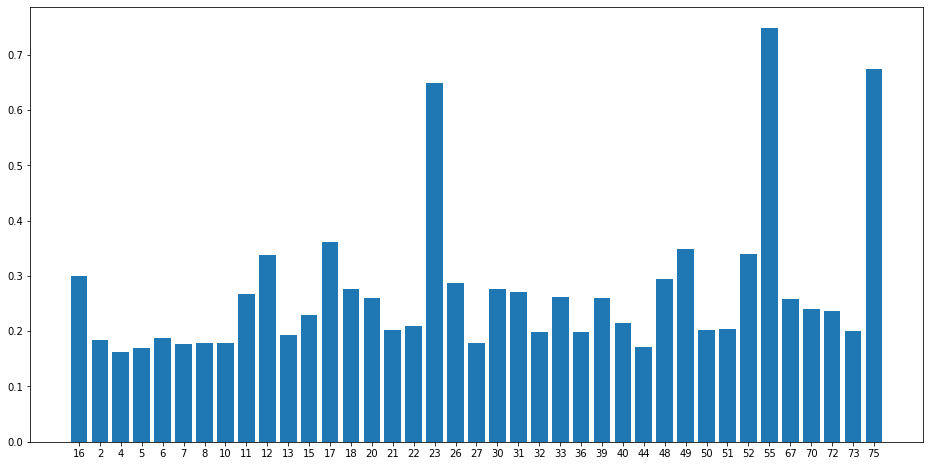

In [19]:
x = [i for i in range(len(routes))]

plt.figure(figsize=(16, 8))

plt.bar(x, modes, tick_label = routes)

In [20]:
def bar_plot_routes(routes, counts, xlabel, ylabel, title):
    x = [i for i in range(len(routes))]
    plt.figure(figsize=(16, 8))
    plt.bar(x, counts, tick_label = routes)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

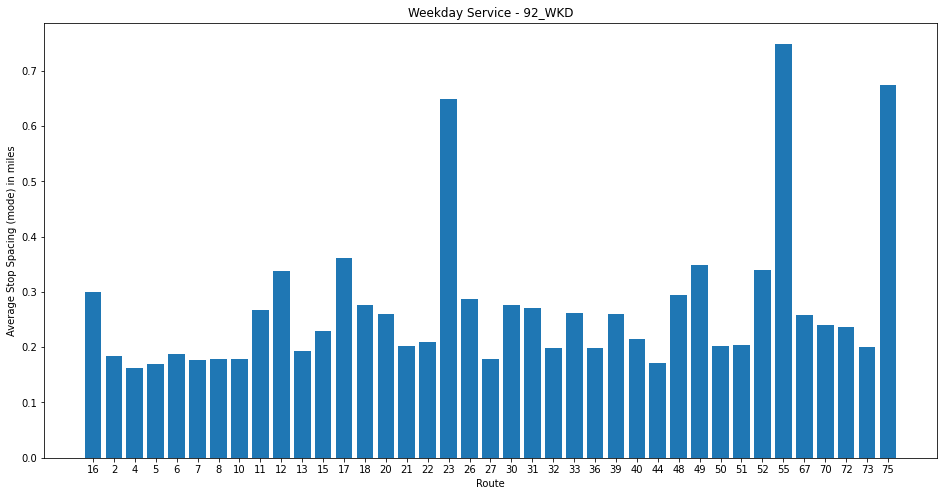

In [22]:
bar_plot_routes(routes, modes, "Route", "Average Stop Spacing (mode) in miles", "Weekday Service - 92_WKD")